In [5]:
should_plot_autotune_without_retraining = False
should_plot_autotune_with_retraining = False
autotune_autoscheduler = "beam"

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("results.csv", index_col="test")

In [8]:
if should_plot_autotune_without_retraining:
    df_auto = pd.read_csv("../autotune/noretrain/{}/results.csv".format(autotune_autoscheduler), index_col="test")
    df["auto"] = df_auto["time"]

if should_plot_autotune_with_retraining:
    df_auto = pd.read_csv("../autotune/retrain/{}/results.csv".format(autotune_autoscheduler), index_col="test")
    df["retrain"] = df_auto["time"]

In [9]:
df

,master,greedy,beam,manual,mcts
test,,,,,
bilateral_grid,0.009105,0.012364,0.008709,0.011589,0
local_laplacian,0.100969,0.126815,0.110570,0.064370,0
nl_means,0.132457,0.187223,0.075342,0.101286,0
lens_blur,0.016595,0.008883,0.010359,0.005674,0
camera_pipe,0.011083,0.012419,0.004578,0.003617,0
stencil_chain,0.021668,0.014126,0.017704,0.019282,0
harris,0.002525,0.007539,0.002490,0.001960,0
hist,0.005754,0.003052,0.009868,0.001676,0
max_filter,0.076304,0.252869,0.135427,0.078124,0


In [21]:
df_scaled = df.copy()

cols = ['master', 'greedy', 'beam', 'manual', 'mcts']

if should_plot_autotune_without_retraining:
    cols.append('auto')
if should_plot_autotune_with_retraining:
    cols.append('retrain')

for col in cols:
    # df_scaled[col] /= df['manual']
    df_scaled[col] /= df.replace(0, np.nan).min(axis=1)
    df_scaled[col] = 1 / df_scaled[col]

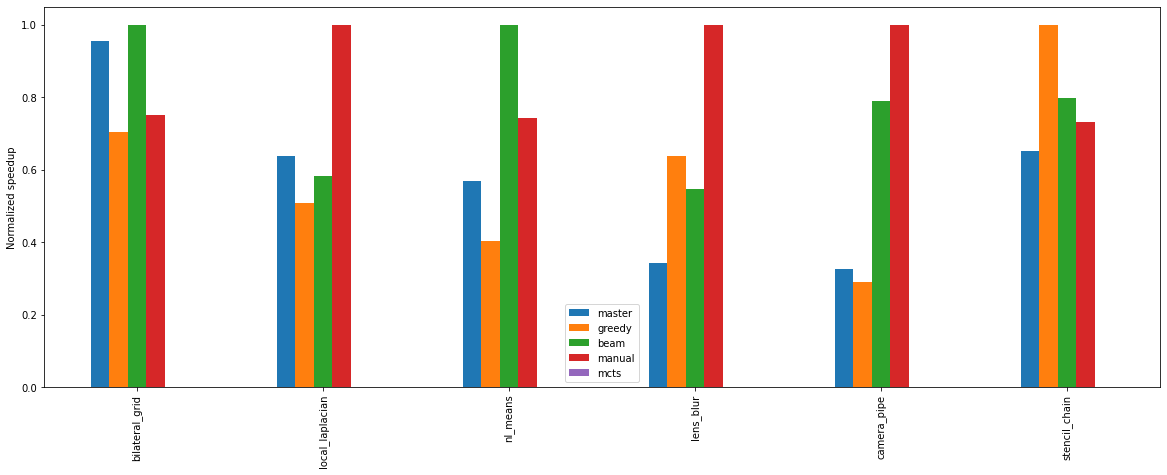

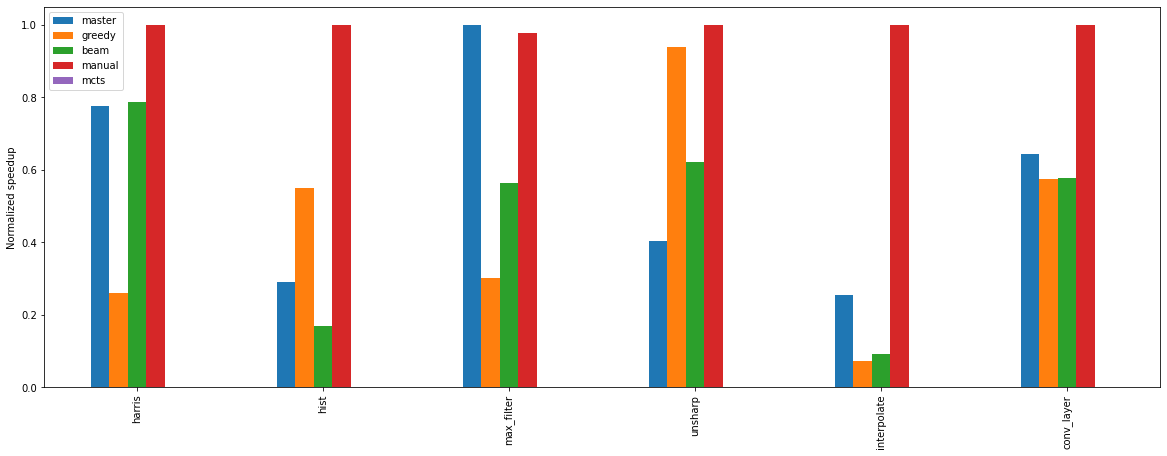

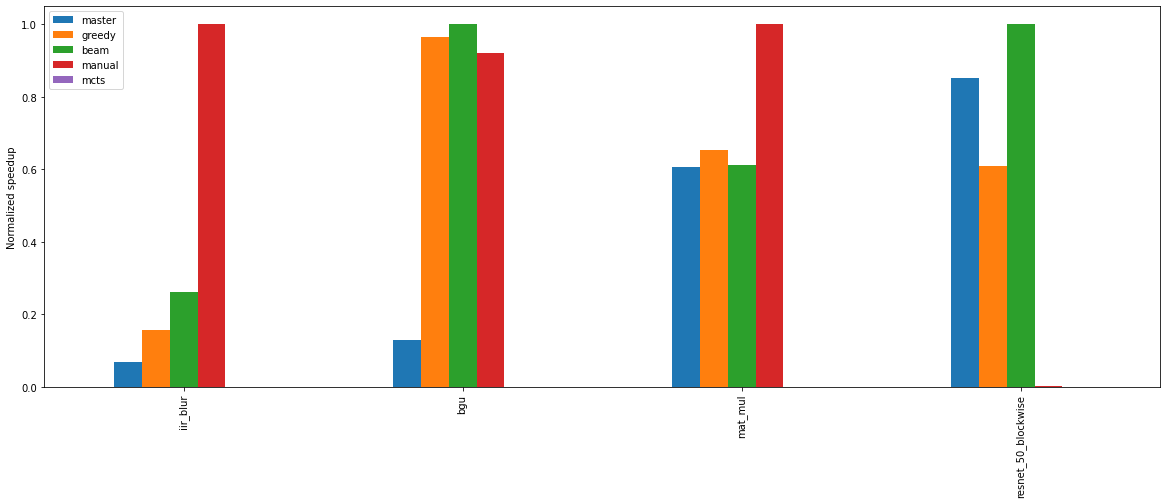

In [36]:
rows=len(df)
benchmarks_per_plot = 6
for i in range(0, rows, benchmarks_per_plot):
    df_scaled.tail(rows-i).head(benchmarks_per_plot).plot(kind='bar', figsize=(20,7))
    plt.ylabel("Normalized speedup")
    plt.xlabel("")

# All benchmarks on one plot

Text(0, 0.5, 'Normalized speedup')

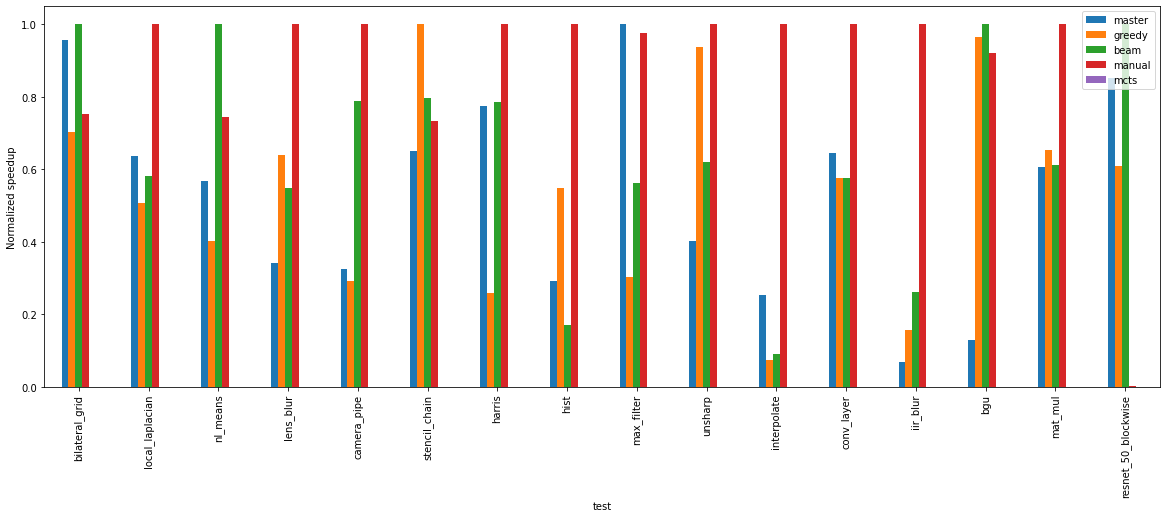

In [24]:
df_scaled.plot(kind='bar', figsize=(20,7))
plt.ylabel("Normalized speedup")

# "standalone_autoscheduler" branch

In [41]:
df_scaled = df.copy()

cols = ['master', 'greedy', 'beam', 'manual']
for col in cols:
    df_scaled[col] /= df['master']
    df_scaled[col] = 1 / df_scaled[col]

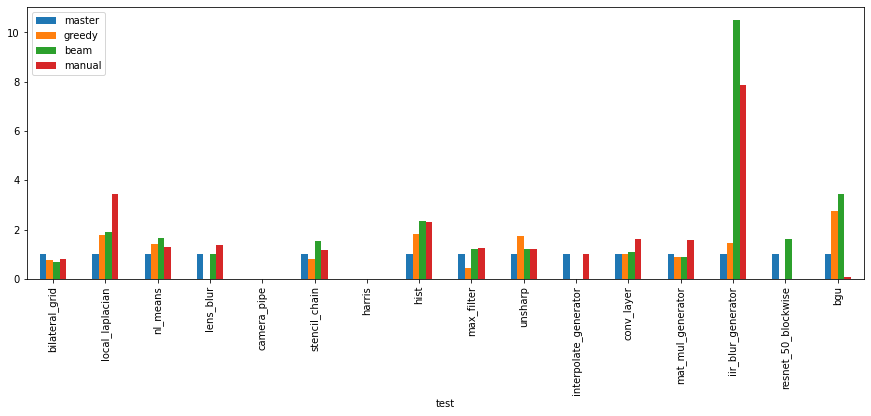

In [42]:
df_scaled.plot(kind='bar', figsize=(15,5))

* Bilateral grid: Does not match. Greedy should do better than master, and beam should be better than greedy. Manual should be slowest.
* Local laplacion: Does not match.